# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/combined_final.csv')

In [3]:
data.shape

(67, 120)

In [4]:
data.drop(columns='all_industries', inplace=True)

In [5]:
objects = ['number of claims_irma',
           'closed claims (paid)_irma',
           'closed claims (not paid)_irma',
           'number claims open_irma',
           'number of claims_michael',
           'closed claims (paid)_michael',
           'closed claims (not paid)_michael',
           'number claims open_michael']

In [6]:
for column in objects:
    data[column] = data[column].map(lambda x: x.replace(',', '')).astype(int)

In [7]:
from sklearn.metrics import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
features = ['nat_resource_mining',
           'trade_trans_util',
           'information',
           'education_health',
           'leisure_hospitality',
           'government',
           'housing_units',
           'highway_miles',
           'number_of_bridges',
           'state_facilities',
           'number of claims_irma',
           'number of claims_michael',
           'hospitals']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
features_df = pd.DataFrame(data, columns=features)
features_df.head()

,nat_resource_mining,trade_trans_util,information,education_health,leisure_hospitality,government,housing_units,highway_miles,number_of_bridges,state_facilities,number of claims_irma,number of claims_michael,hospitals
0,81,1294,108,955,713,0,112766,293.4,70,365,4218,0,6
1,6,124,7,38,43,34,9687,83.9,36,146,567,0,2
2,34,1203,49,635,698,130,99650,215.1,52,106,201,81736,5
3,22,141,7,52,53,32,11011,69.0,24,147,850,0,1
4,53,3002,210,1868,1435,171,269864,335.4,174,60,46883,0,11


In [11]:
ss = StandardScaler()
ss.fit(features_df)
scaled_df = pd.DataFrame(
    ss.transform(features_df),
    columns=features_df.columns,
    index=features_df.index)
scaled_df.head()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,nat_resource_mining,trade_trans_util,information,education_health,leisure_hospitality,government,housing_units,highway_miles,number_of_bridges,state_facilities,number of claims_irma,number of claims_michael,hospitals
0,0.034246,-0.178775,-0.105819,-0.062462,-0.089739,-1.138233,-0.109014,0.937570,-0.231470,2.358040,-0.406438,-0.190044,0.169224
1,-0.785201,-0.481451,-0.481710,-0.541325,-0.584447,-0.693864,-0.633942,-0.805411,-0.466971,0.044774,-0.546633,-0.190044,-0.452036
2,-0.479274,-0.202316,-0.325399,-0.229568,-0.100815,0.560826,-0.175807,0.286136,-0.356147,-0.377741,-0.560687,7.912757,0.013909
3,-0.610386,-0.477053,-0.481710,-0.534014,-0.577063,-0.720003,-0.627200,-0.929375,-0.550089,0.055337,-0.535766,-0.190044,-0.607351
4,-0.271681,0.263079,0.273795,0.414312,0.443363,1.096683,0.691005,1.286999,0.488888,-0.863632,1.231861,-0.190044,0.945799


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

### Apply PCA

In [13]:
pca = PCA(n_components=5)
pca.fit(scaled_df.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
scaled_df = pd.DataFrame(
    pca.transform(scaled_df),
    index=scaled_df.index,
    columns=['PC{}'.format(num+1) for num in range(5)])
scaled_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.073460,1.105864,-2.264818,-0.429031,0.033296
1,-1.910559,-0.130097,-0.195769,-0.360486,0.174118
2,-0.619465,6.664257,4.288702,0.800557,0.378271
3,-1.970636,-0.140282,-0.254914,-0.158940,0.243223
4,1.956380,-0.558024,0.948921,-0.529654,-0.096362


In [15]:
scaled_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.073460,1.105864,-2.264818,-0.429031,0.033296
1,-1.910559,-0.130097,-0.195769,-0.360486,0.174118
2,-0.619465,6.664257,4.288702,0.800557,0.378271
3,-1.970636,-0.140282,-0.254914,-0.158940,0.243223
4,1.956380,-0.558024,0.948921,-0.529654,-0.096362


### Implementing Hierarchical Clustering Algorithm with Single Linkage Method

In [16]:
Z = linkage(scaled_df, 'average')

In [17]:
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])

### Interpreting cophenetic coefficients

In [18]:
c, coph_dists = cophenet(Z, pdist(scaled_df))
c

0.9590065394778627

After implementing the clustering algorithm using five different linkage methods, the "average" method yields the 'c' value closest to 1.

### Visualizing our clusters with a dendrogram

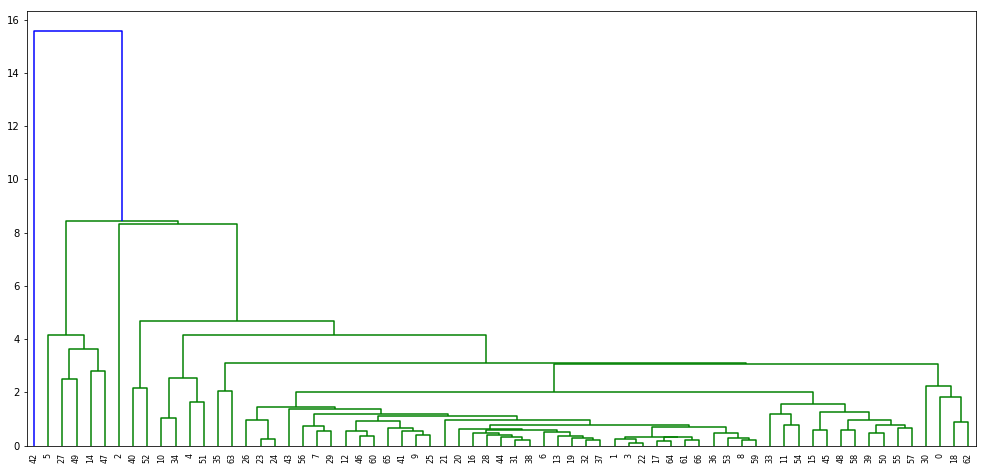

In [19]:
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

After assessing our dendrogram, we see that no link occurs above a distance of 12, so we will set our maximum distance to 12 and use fcluster to return our cluster IDs. 

In [20]:
max_dist = 12 # pairwise distance

# Fcluster here
#list(fcluster(Z, max_dist, criterion='distance'))
scaled_df['cluster'] = list(fcluster(Z, max_dist, criterion='distance'))
# scaled_df.head()

In [21]:
scaled_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster
0,-0.073460,1.105864,-2.264818,-0.429031,0.033296,1
1,-1.910559,-0.130097,-0.195769,-0.360486,0.174118,1
2,-0.619465,6.664257,4.288702,0.800557,0.378271,1
3,-1.970636,-0.140282,-0.254914,-0.158940,0.243223,1
4,1.956380,-0.558024,0.948921,-0.529654,-0.096362,1


In [22]:
scaled_df.shape

(67, 6)

In [23]:
scaled_df['cluster'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [24]:
scaled_df['cluster'].value_counts()

1    66
2     1
Name: cluster, dtype: int64

The majority of our data is grouped into Cluster 2. Let's create some scatter plots to visualize the relationship between the 61 data points in Cluster 2 and the six data points split between Clusters 1 & 3.

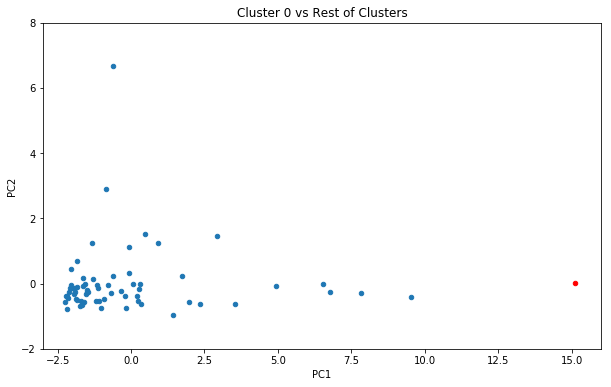

In [25]:
ax = scaled_df[scaled_df['cluster'].isin(list(scaled_df['cluster'].value_counts()[1:].index))].plot(
    kind='scatter', x='PC1', y='PC2', xlim=(-3,16), ylim=(-2, 8), c='r', figsize=(10,6))

scaled_df[scaled_df['cluster'].isin(list(scaled_df['cluster'].value_counts()[:1].index))].plot(
    kind='scatter', x='PC1', y='PC2', xlim=(-3,16), ylim=(-2, 8), title='Cluster 0 vs Rest of Clusters', ax=ax, )